In [1]:
# import required dependencies
import pandas as pd
import seaborn as sns                         #data visualization
import matplotlib.pyplot as plt               #data visualization
%matplotlib inline
import numpy as np                            #data manipulation
from scipy.stats import randint as sp_randint
import warnings                               #ignore warnings
warnings. filterwarnings("ignore")
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree  # to build the decision tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Preprocessing Data

In [3]:
# Import data
grpr_df = pd.read_csv('garments_worker_productivity.csv')
grpr_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [4]:
# Getting statistical info
grpr_df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [5]:
# Check datatypes
grpr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
# Getting department description
grpr_df['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

Note above 'sewing' is misspelled as 'sweing' in the dataset.

### Department column showing 2 distinct values for finishing 

In [9]:
# Replace correct spelling of 'sewing'
update_grpr_df = grpr_df['department']=grpr_df['department'].str.strip()
update_grpr_df = grpr_df['department']=grpr_df['department'].str.replace('sweing', 'sewing')
update_grpr_df

0          sewing
1       finishing
2          sewing
3          sewing
4          sewing
          ...    
1192    finishing
1193    finishing
1194    finishing
1195    finishing
1196    finishing
Name: department, Length: 1197, dtype: object

In [10]:
# Create a copy of the original DataFrame
updated_grpr_df = grpr_df.copy()

# Replace correct spelling of 'sewing' in the copied DataFrame
updated_grpr_df['department'] = updated_grpr_df['department'].str.strip()
updated_grpr_df['department'] = updated_grpr_df['department'].str.replace('sweing', 'sewing')

# Display the updated DataFrame
updated_grpr_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [11]:
updated_grpr_df.value_counts()

date       quarter   department  day       team  targeted_productivity  smv    wip     over_time  incentive  idle_time  idle_men  no_of_style_change  no_of_workers  actual_productivity
1/1/2015   Quarter1  sewing      Thursday  1     0.75                   28.08  681.0   6900       45         0.0        0         0                   57.5           0.750428               1
2/24/2015  Quarter4  sewing      Tuesday   9     0.70                   18.79  1068.0  3000       30         0.0        0         1                   52.0           0.700257               1
                                           1     0.60                   22.53  708.0   5040       0          0.0        0         1                   42.0           0.268214               1
                                           2     0.70                   30.33  408.0   1680       30         0.0        0         1                   59.0           0.700623               1
                                           3     0.75  

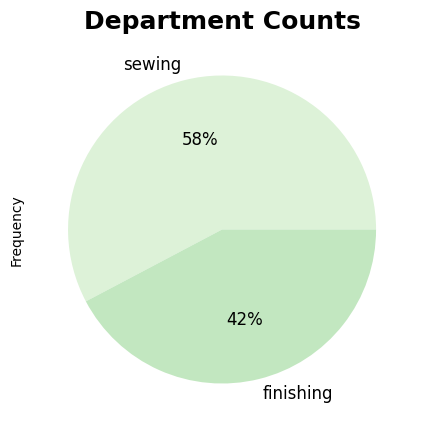

In [12]:
# Showing percentage distribution of departments
plt.figure(figsize=(6,5))
# Use matplotlib.pyplot.pie 
plt.pie(x=update_grpr_df.value_counts(), labels = update_grpr_df.value_counts().index,colors=sns.color_palette("GnBu"),
        autopct='%.0f%%', textprops={'fontsize': 12})
plt.title("Department Counts",fontsize=18,fontweight="bold")
plt.ylabel('Frequency')
plt.show()

From the plot, between the 2 departments; sewing has around 691 records and finishing has around 506 records. 

### The date range is from 01-01-2015 to 03-11-2015 in the dataset
Assuming that Productivity of the week is a quarter

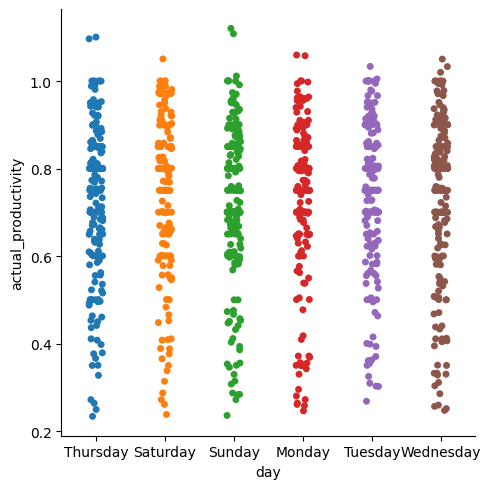

In [15]:
sns.catplot(x='day',y='actual_productivity',data=updated_grpr_df, hue='day')

In [16]:
updated_grpr_df['quarter'].value_counts().sort_index()

quarter
Quarter1    360
Quarter2    335
Quarter3    210
Quarter4    248
Quarter5     44
Name: count, dtype: int64

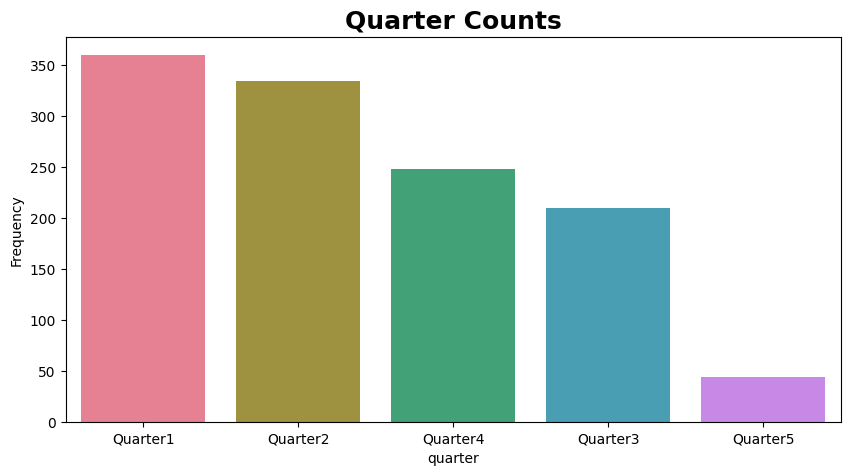

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='quarter', data = updated_grpr_df, order = updated_grpr_df['quarter'].value_counts().index,palette="husl")
plt.title("Quarter Counts",fontsize=18,fontweight="bold")
plt.ylabel('Frequency')
plt.show()

Plot indicates Quarter1 has most data samples and Quarter 5 has least data samples of less than 50. From Quarter 1 to Quarter 4 variation in data sample is very less ranging from 350 to 220.

### Finding no. of teams of workers 

In [20]:
updated_grpr_df['team'].value_counts().sort_index()

team
1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: count, dtype: int64

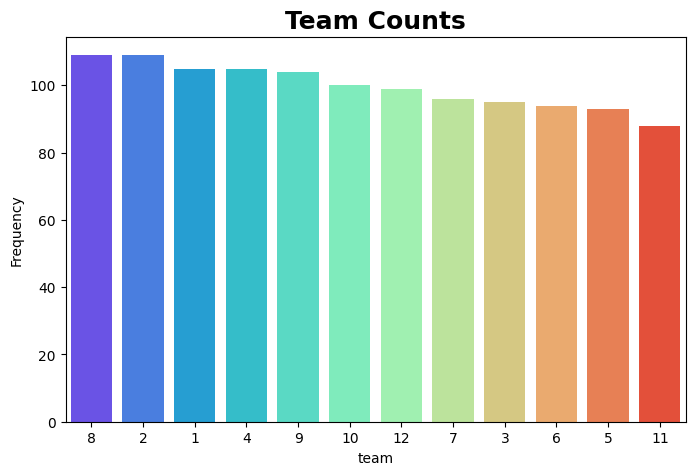

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='team',data = updated_grpr_df, order = updated_grpr_df['team'].value_counts().index,palette=('rainbow'))
plt.title("Team Counts",fontsize=18,fontweight="bold")
plt.ylabel('Frequency')
plt.show()

In [22]:
# Compare actual_productivity with targeted_productivity.
# Is target achieved?
updated_grpr_df['target_achieved'] = np.where((updated_grpr_df['targeted_productivity'] <= updated_grpr_df['actual_productivity']), 'yes', 'no')
updated_grpr_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target_achieved
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,yes
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,yes
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,yes
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,yes
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,no
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,no
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,no
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,no


In [23]:
# Get the column names from updated_grpr_df
cols = updated_grpr_df.columns.tolist()
# Find the index of 'targeted_productivity' and 'no_of_workers'
target_idx = cols.index('targeted_productivity')
workers_idx = cols.index('no_of_workers')

# Move 'targeted_productivity' after 'no_of_workers' if it's not already
if target_idx > workers_idx:
    cols.pop(target_idx)
    cols.insert(workers_idx + 1, 'targeted_productivity')
    updated_grpr_df = updated_grpr_df[cols]

# Display the updated DataFrame
new_df = updated_grpr_df
new_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target_achieved
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,yes
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,yes
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,yes
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,yes
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,no
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,no
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,no
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,no


In [24]:
# Compare actual_productivity with targeted_productivity.
# Is target achieved?
new_df['target_achieved'] = np.where((new_df['targeted_productivity'] <= new_df['actual_productivity']), 'yes', 'no')
new_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target_achieved
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,yes
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,yes
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,yes
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,yes
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,no
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,no
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,no
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,no


In [25]:
# Find the index of 'targeted_productivity' and 'no_of_workers'
target_prod = cols.index('targeted_productivity')
workers_idx = cols.index('no_of_workers')

# Move 'targeted_productivity' after 'no_of_workers' if it's not already
if target_prod > workers_idx:
    cols.insert(workers_idx + 1, cols.pop(target_prod))
    updated_grpr_df = updated_grpr_df.reindex(columns=cols)

# Display the updated DataFrame
new_df = updated_grpr_df
new_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target_achieved
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,yes
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,yes
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,yes
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,yes
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,no
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,no
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,no
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,no


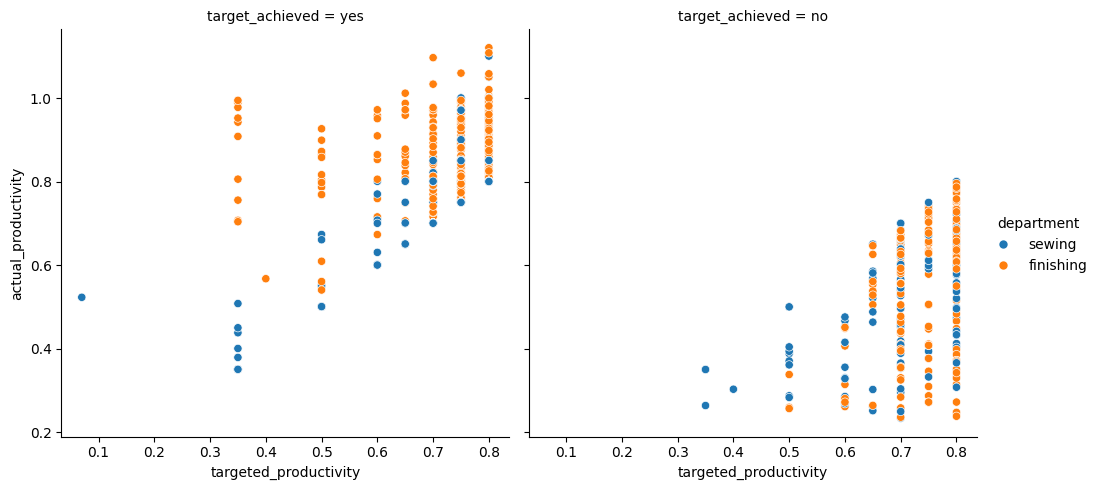

In [26]:
g = sns.relplot(data=new_df, x="targeted_productivity", 
                y="actual_productivity", col="target_achieved", hue="department")
g.set_axis_labels("targeted_productivity", "actual_productivity")

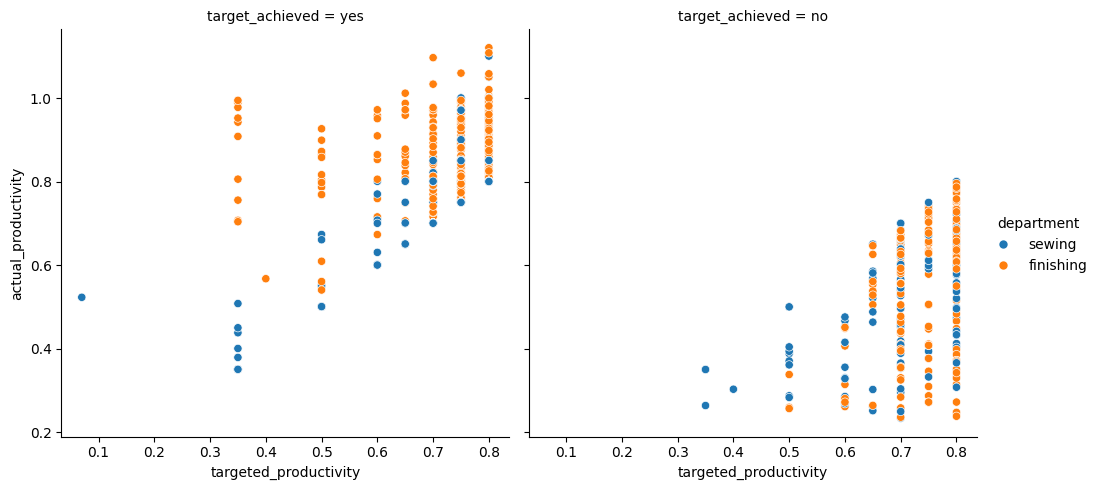

In [27]:
# Visualization of actual with targeted productivity to ascertain if target was achieved.
g = sns.relplot(data=new_df, x="targeted_productivity",
                y="actual_productivity", col="target_achieved", hue="department")
g.set_axis_labels("targeted_productivity", "actual_productivity")

# Detecting and Removing Outliers

In [29]:
# Convert the 'date' column to datetime objects
new_df['date'] = pd.to_datetime(new_df['date'])

# Extract relevant features for correlation analysis (excluding the date)
numeric_df = new_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'no_of_workers'),
  Text(10, 0, 'actual_productivity')])

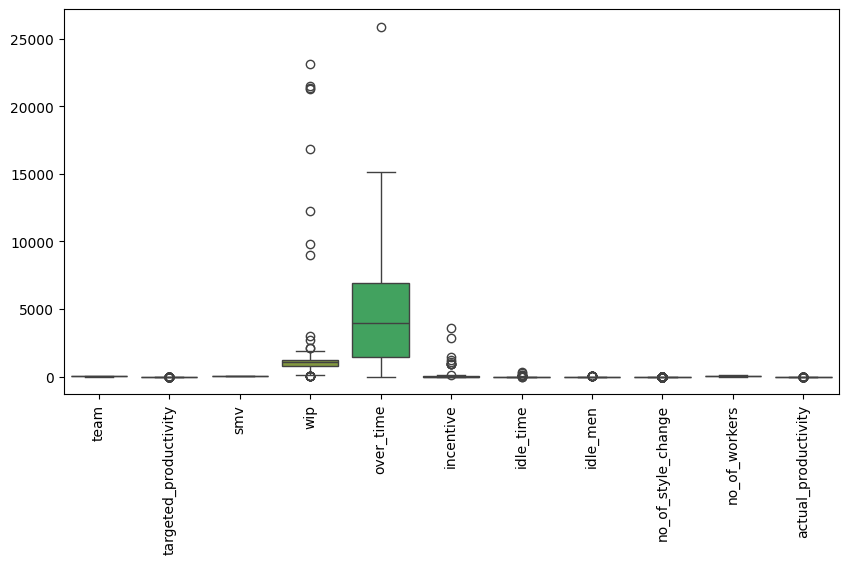

In [30]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = new_df, orient ="v", width=0.8)
plt.xticks(rotation=90)

### Analyzing column 'smv' for outliers
smv=std min value, it is the allocated time for a task
some rows have very less column smv for departmet 'finishing' 

In [32]:
updated_grpr_df[updated_grpr_df['department']=='finishing']['smv'].max()

5.13

In [33]:
updated_grpr_df[updated_grpr_df['department']=='finishing']['smv'].min()

2.9

Value of smv for department 'finishing' ranges from 2.9 to 5.13

In [35]:
updated_grpr_df[updated_grpr_df['department']=='finishing']['smv'].mean()

3.887035573122529

In [36]:
updated_grpr_df[updated_grpr_df['department']=='finishing']['smv'].median()

3.94

In [37]:
updated_grpr_df[updated_grpr_df['department']=='sewing']['smv'].max()

54.56

In [38]:
updated_grpr_df[updated_grpr_df['department']=='sewing']['smv'].min()

10.05

Value of smv for department 'finishing' ranges from 10.05 to 54.56

In [40]:
updated_grpr_df[updated_grpr_df['department']=='sewing']['smv'].mean()

23.245412445730825

In [41]:
updated_grpr_df[updated_grpr_df['department']=='sewing']['smv'].median()

22.52

## Exploratory Data Analysis 

In [43]:
# Get a list of columns
cols = updated_grpr_df.columns.tolist()

# Print the list of columns to inspect the actual column names
print(cols)

['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity', 'target_achieved']


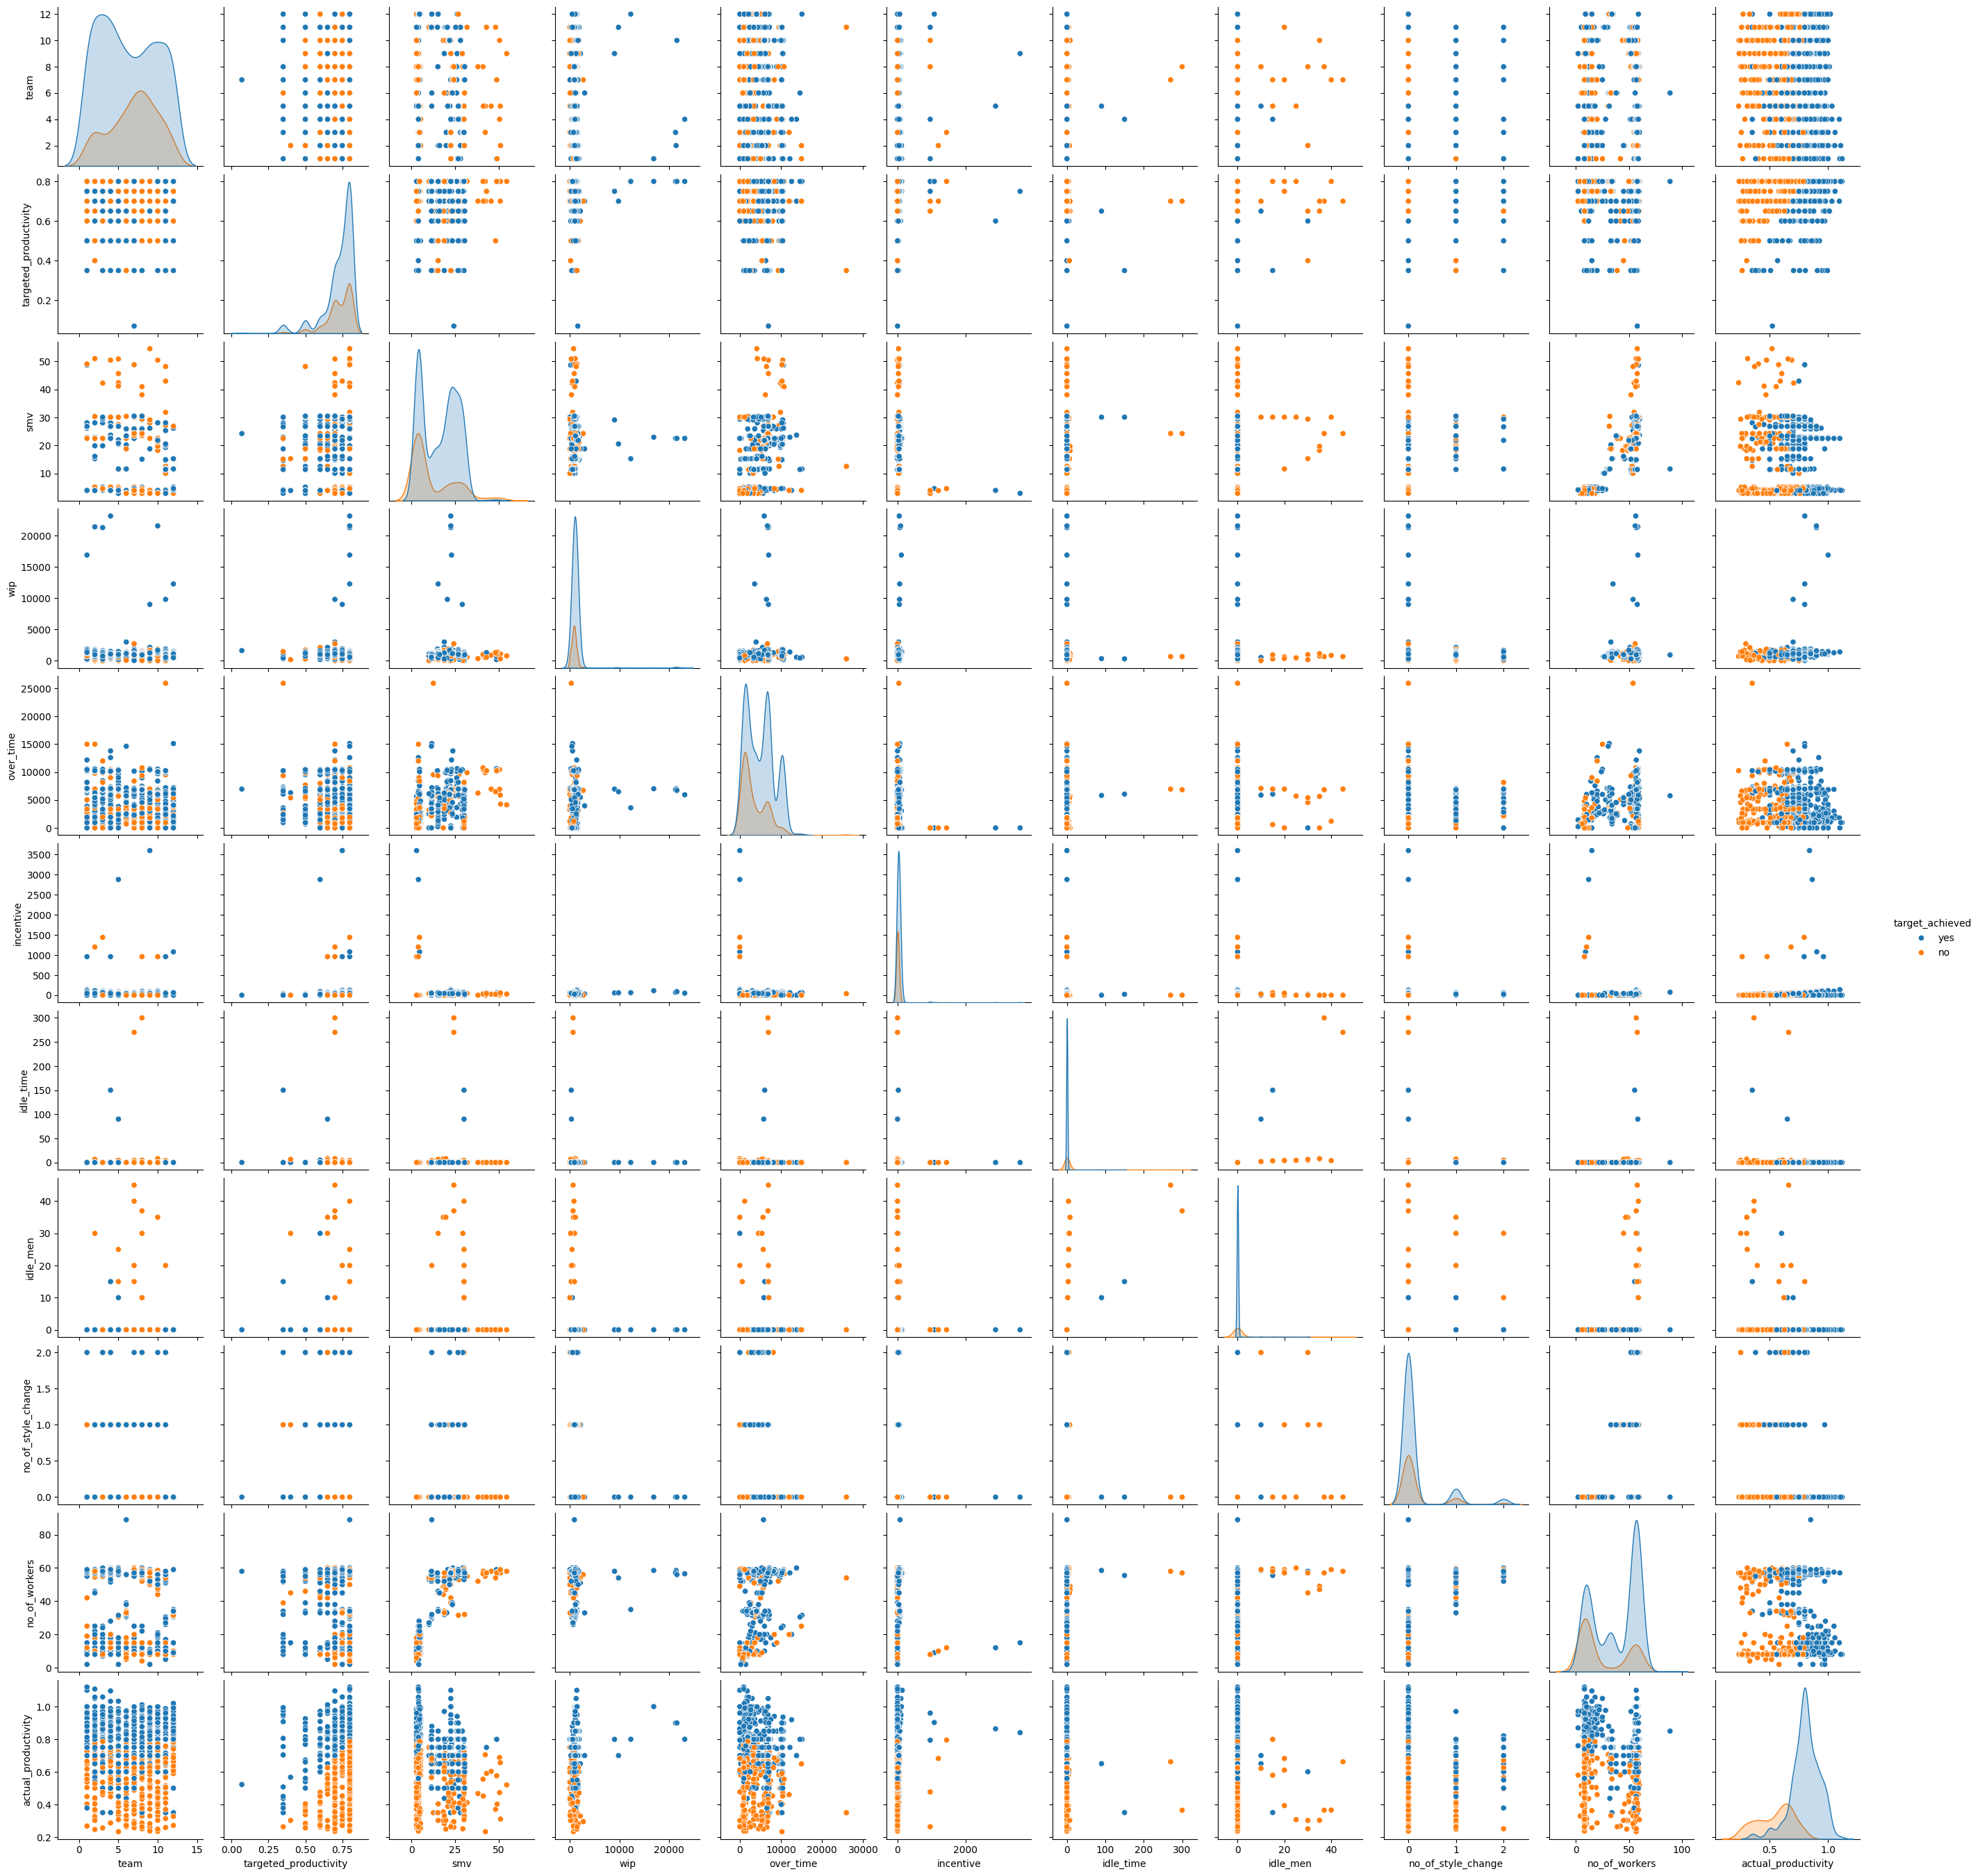

In [44]:
plot = sns.pairplot(new_df, hue='target_achieved')

### Analyzing column 'wip' null values
wip=work in progress; includes no. of unfinished items for products
Removing NaN from rows in wip

In [46]:
# Calculate the mean of the 'wip' column
mean_wip = new_df['wip'].mean()

# Fill missing values in 'wip' with the mean
new_df['wip'].fillna(value=mean_wip, inplace=True)

In [47]:
# Convert the 'date' column to datetime objects
new_df['date'] = pd.to_datetime(new_df['date'])  

# Extract relevant features for correlation analysis (excluding the date)
numeric_df = new_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.025384,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.049114,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.018322,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.025384,0.049114,-0.018322,1.000000,0.014490,0.021881,-0.026267,-0.048490,-0.069004,0.009791,0.088365
over_time,-0.096737,-0.088557,0.674887,0.014490,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.021881,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026267,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048490,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.069004,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.009791,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


In [50]:
# Calculate the correlation matrix, only including numeric columns
corr = new_df.select_dtypes(include=['number']).corr()

mask=np.zeros(corr.shape,dtype=bool)
mask[np.triu_indices(len(mask))]=True

<Axes: >

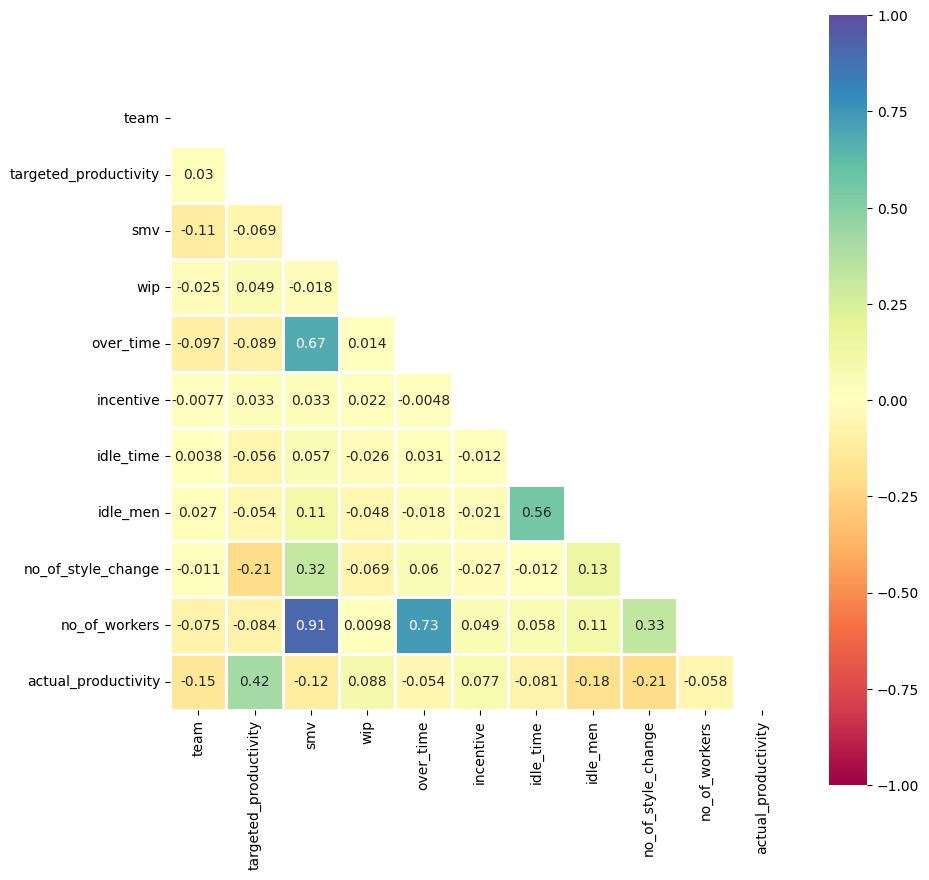

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Visualizing correlation.
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='Spectral',square=True,mask=mask,linecolor='white',linewidths=1)

Correlation between features in the dataset: more incentives did not correlate to productivity as shown in the plot. No strong correlation when the value is closer to zero. Correlations vary from -1 to +1. Closer to +1 means strong positive correlation whereas closer to -1 means strong negative correlation. The variables with strong correlations are probably the features for model building. The max for traget_productivity is around 0.8; in a few instances, actual_productivity is going beyond the traget. There are probably only a couple values wherein the target and actual productivity are having a strong correlation. The regression model can fail in predicting accurately in this scenario which probably indicates that the data is imbalanced. It could overfit in certain models.

## Model Analysis 

In [54]:
# Setting X and y
X = new_df.iloc[:,:-2]
X

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0


In [55]:
y = new_df['actual_productivity']
y

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

### Format data 

In [57]:
X = X.drop(columns=['date', 'day'])
X

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,Quarter1,sewing,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0
1,Quarter1,finishing,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0
2,Quarter1,sewing,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5
3,Quarter1,sewing,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5
4,Quarter1,sewing,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0
1193,Quarter2,finishing,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0
1194,Quarter2,finishing,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0
1195,Quarter2,finishing,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0


In [58]:
X_encoded = pd.get_dummies(X, columns=['quarter' ,'department' , 'team', 'no_of_style_change'],  dtype=int)
X_encoded

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,quarter_Quarter1,quarter_Quarter2,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
0,0.80,26.16,1108.000000,7080,98,0.0,0,59.0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,0.75,3.94,1190.465991,960,0,0.0,0,8.0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.80,11.41,968.000000,3660,50,0.0,0,30.5,1,0,...,0,0,0,0,0,1,0,1,0,0
3,0.80,11.41,968.000000,3660,50,0.0,0,30.5,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0.80,25.90,1170.000000,1920,50,0.0,0,56.0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.75,2.90,1190.465991,960,0,0.0,0,8.0,0,1,...,0,0,0,0,1,0,0,1,0,0
1193,0.70,3.90,1190.465991,960,0,0.0,0,8.0,0,1,...,0,0,1,0,0,0,0,1,0,0
1194,0.65,3.90,1190.465991,960,0,0.0,0,8.0,0,1,...,0,1,0,0,0,0,0,1,0,0
1195,0.75,2.90,1190.465991,1800,0,0.0,0,15.0,0,1,...,0,0,0,1,0,0,0,1,0,0


### Splitting X and y in train and test datasets. 

In [60]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [62]:
# Checking data size and split sizes
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (957, 30)
y_train shape:  (957,)
X_test shape:  (240, 30)
y_test shape:  (240,)


In [63]:
# Scaling after Encoding data
from sklearn.preprocessing import StandardScaler

In [64]:
# Apply StandardScaler on the encoded data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
# Apply Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [67]:
# Scale the training data
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ -9.96959267,  -1.22649155,  -0.82561054, ..., -10.30960264,
          9.32698356,  -1.19060448],
       [ -5.04845529,  -1.44821709,  -0.82547735, ...,  -1.44300117,
         -1.45506773,  -1.19060448],
       [ -5.04845529,  -1.45690566,  -0.82547735, ...,  -1.44300117,
         -1.45506773,  -1.19060448],
       ...,
       [-19.81186742,  -1.44821709,  -0.82547735, ...,  -1.44300117,
         -1.45506773,  -1.19060448],
       [ -5.04845529,  -1.22966622,  -0.82583696, ..., -10.30960264,
          9.32698356,  -1.19060448],
       [ -9.96959267,  -1.45690566,  -0.82547735, ...,  -1.44300117,
         -1.45506773,  -1.19060448]])

In [68]:
# Scaling the testing data
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-19.81186742,  -1.29290896,  -0.82570978, ..., -10.30960264,
          9.32698356,  -1.19060448],
       [ -0.12731791,  -1.38580979,  -0.82555562, ...,  -1.44300117,
         -1.45506773,  -1.19060448],
       [ -0.12731791,  -1.45690566,  -0.82547735, ...,  -1.44300117,
         -1.45506773,  -1.19060448],
       ...,
       [-19.81186742,  -1.44855127,  -0.82547735, ...,  -1.44300117,
         -1.45506773,  -1.19060448],
       [ -9.96959267,  -1.44821709,  -0.82547735, ...,  -1.44300117,
         -1.45506773,  -1.19060448],
       [ -0.12731791,  -1.22966622,  -0.82560668, ..., -10.30960264,
          9.32698356,  -1.19060448]])

In [69]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regessor model
rf_model = RandomForestRegressor(random_state=42)

# Fit model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [70]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [71]:
# Print the model's score
rf_train_score = rf_model.score(X_train_scaled, y_train)
print("Random Forest - Training Data Score:%.4f" % rf_train_score)

Random Forest - Training Data Score:0.8821


In [72]:
# Make and save testing predictions with the saved logistic regression model using the test data
rf_testing_predictions = rf_model.predict(X_test_scaled)

# Review the predictions
rf_testing_predictions

array([0.45555353, 0.80019762, 0.66818737, 0.5271437 , 0.58256182,
       0.69716331, 0.48312771, 0.48312771, 0.61819574, 0.75034909,
       0.71751189, 0.92372011, 0.8062335 , 0.71614608, 0.86886409,
       0.8298233 , 1.01429833, 0.59350008, 0.57988555, 0.90697929,
       1.01569528, 0.69942606, 0.9056524 , 0.84597889, 0.84884317,
       0.47487956, 0.76823613, 1.00023073, 0.54890367, 0.86659611,
       0.96476918, 0.80040055, 0.85203679, 0.89097862, 0.70445211,
       0.43380984, 0.91987505, 0.80773851, 0.80035081, 0.65222482,
       0.78239933, 0.85093697, 0.5787907 , 0.90913544, 0.75063997,
       0.80040068, 0.50432305, 0.93265999, 0.78256649, 0.85563881,
       0.73749212, 0.83531855, 0.69474148, 0.79805273, 0.48750575,
       0.66051354, 0.49057615, 0.75051405, 0.91962932, 0.73920291,
       0.67074757, 0.45013669, 0.5553452 , 0.88820405, 0.43706863,
       0.73800545, 0.80175178, 0.78820142, 0.47261234, 0.6385829 ,
       0.79946819, 0.61415815, 0.69886442, 0.74216137, 0.75319

In [73]:
# Make predictions for the test set using your trained model
y_pred_test = rf_model.predict(X_test_scaled)
y_pred_train = rf_model.predict(X_train_scaled)

In [74]:
# Get the model's testing score
rf_test_score = rf_model.score(X_test_scaled, y_test)
print("Random Forest - Testing Data Score:%.4f"% rf_test_score)

Random Forest - Testing Data Score:0.5161


In [75]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, rf_testing_predictions)
rf_r2 = r2_score(y_test, rf_testing_predictions)
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

# Calculate metrics for RFR
print(f"Random Forest - Mean Squared Error: {rf_mse:.4f}")
print(f"Random Forest - R-squared: {rf_r2:.4f}")
print("RFR - Training Data Score:%.4f" % rf_train_score)
print("RFR - Testing Data Score:%.4f"% rf_test_score)

Random Forest - Mean Squared Error: 0.0128
Random Forest - R-squared: 0.5161
RFR - Training Data Score:0.8821
RFR - Testing Data Score:0.5161


In [76]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
pred_knr = knr.predict(X_test)
print(f"KNeighborRegressor - Mean Squared Error: {rf_mse:.4f}")
print(f"KNeighborRegressor - R-squared: {rf_r2:.4f}")
print("KNR - Training Data Score:%.4f" % rf_train_score)
print("KNR - Testing Data Score:%.4f"% rf_test_score)

KNeighborRegressor - Mean Squared Error: 0.0128
KNeighborRegressor - R-squared: 0.5161
KNR - Training Data Score:0.8821
KNR - Testing Data Score:0.5161


In [77]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
pred_svr = svr.predict(X_test)

# Calculate metrics for SVR
svr_mse = mean_squared_error(y_test, pred_svr)
svr_r2 = r2_score(y_test, pred_svr)
svr_train_score = svr.score(X_train, y_train)
svr_test_score = svr.score(X_test, y_test)

print(f"SVRegressor - Mean Squared Error: {svr_mse:.4f}")
print(f"SVRegressor - R-squared: {svr_r2:.4f}")
print("SVR - Training Data Score:%.4f" % svr_train_score)
print("SVR - Testing Data Score:%.4f"% svr_test_score)

SVRegressor - Mean Squared Error: 0.0187
SVRegressor - R-squared: 0.2973
SVR - Training Data Score:0.5805
SVR - Testing Data Score:0.2973


In [78]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)

# Calculate metrics for DecisionTreeRegressor
dt_mse = mean_squared_error(y_test, pred_dt)
dt_r2 = r2_score(y_test, pred_dt)
dt_train_score = dt.score(X_train, y_train)
dt_test_score = dt.score(X_test, y_test)

print(f"DTRegressor - Mean Squared Error: {dt_mse:.4f}")
print(f"DTRegressor - R-squared: {dt_r2:.4f}")
print("DTR - Training Data Score:%.4f" % dt_train_score)
print("DTR - Testing Data Score:%.4f"% dt_test_score)

DTRegressor - Mean Squared Error: 0.0195
DTRegressor - R-squared: 0.2664
DTR - Training Data Score:0.9364
DTR - Testing Data Score:0.2664


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train,y_train)
pred_gb = gb.predict(X_test)

# Calculate metrics for GradientBoostingRegressor
gb_mse = mean_squared_error(y_test, pred_gb)
gb_r2 = r2_score(y_test, pred_gb)
gb_train_score = gb.score(X_train, y_train)
gb_test_score = gb.score(X_test, y_test)

print(f"GradientBoostingRegressor - Mean Squared Error: {gb_mse:.4f}")
print(f"GradientBoostingRegressor - R-squared: {gb_r2:.4f}")
print("GBR - Training Data Score:%.4f" % gb_train_score)
print("GBR - Testing Data Score:%.4f"% gb_test_score)

GradientBoostingRegressor - Mean Squared Error: 0.0142
GradientBoostingRegressor - R-squared: 0.4657
GBR - Training Data Score:0.6716
GBR - Testing Data Score:0.4657


In [80]:
from sklearn.ensemble import AdaBoostRegressor

adab = AdaBoostRegressor(random_state=42)
adab.fit(X_train,y_train)
pred_adab = adab.predict(X_test)

# Calculate metrics for AdaBoostRegressor
ada_mse = mean_squared_error(y_test, pred_adab)
ada_r2 = r2_score(y_test, pred_adab)
ada_train_score = adab.score(X_train, y_train)
ada_test_score = adab.score(X_test, y_test)

print(f"AdaBoostRegressor - Mean Squared Error: {ada_mse:.4f}")
print(f"AdaBoostRegressor - R-squared: {ada_r2:.4f}")
print("AdaBoostR - Training Data Score:%.4f" % ada_train_score)
print("AdaBoostR - Testing Data Score:%.4f"% ada_test_score)

AdaBoostRegressor - Mean Squared Error: 0.0197
AdaBoostRegressor - R-squared: 0.2573
AdaBoostR - Training Data Score:0.3665
AdaBoostR - Testing Data Score:0.2573


In [81]:
!pip install xgboost==1.7.5

Defaulting to user installation because normal site-packages is not writeable


In [82]:
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

# Calculate metrics for XGBRegressor
xgb_mse = mean_squared_error(y_test, pred_xgb)
xgb_r2 = r2_score(y_test, pred_xgb)
xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)

print(f"XGBRegressor - Mean Squared Error: {xgb_mse:.4f}")
print(f"XGBRegressor - R-squared: {xgb_r2:.4f}")
print("XGBR - Training Data Score:%.4f" % xgb_train_score)
print("XGBR - Testing Data Score:%.4f"% xgb_test_score)

XGBRegressor - Mean Squared Error: 0.0151
XGBRegressor - R-squared: 0.4320
XGBR - Training Data Score:0.9256
XGBR - Testing Data Score:0.4320


In [83]:
from sklearn.linear_model import Lasso
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different alpha values
alpha = 0.01  # Example alpha value

lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X_train_scaled, y_train)
pred_lasso = lasso.predict(X_test_scaled)
lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

In [84]:
# Calculate metrics for Lasso Regression
lasso_mse = mean_squared_error(y_test, pred_lasso)
lasso_r2 = r2_score(y_test, pred_lasso)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)

print(f"Lasso Regression - Mean Squared Error: {lasso_mse:.4f}")
print(f"Lasso Regression - R-squared: {lasso_r2:.4f}")
print("Lasso - Training Data Score:%.4f" % lasso_train_score)
print("Lasso - Testing Data Score:%.4f"% lasso_test_score)

Lasso Regression - Mean Squared Error: 0.0267
Lasso Regression - R-squared: -0.0064
Lasso - Training Data Score:0.0000
Lasso - Testing Data Score:-0.0064


In [85]:
data = {'Model': ['Random Forest Regressor', 'KNeighbors Regressor',
                  'SVRegressor', 'DecisionTree Regressor', 
                  'GradientBoosting Regressor', 'AdaBoost Regressor', 
                  'XGBRegressor', 'Lasso Regression'],
        'MSE': [0.0128, 0.0128, 0.0187, 0.0195, 0.0142, 0.0197, 0.0151, 0.0267],
        'R-squared': [0.5161, 0.5161, 0.2973, 0.2664, 0.4657, 0.2573, 0.4320, -0.0064],
        'Training Data Score': [0.8821, 0.8821, 0.5805, 0.9364, 0.6716, 0.3665, 0.9256, 0.0000],
        'Testing Data Score': [0.5161, 0.5161, 0.2973, 0.2664, 0.4657, 0.2573, 0.4320, -0.0064]}
df = pd.DataFrame(data)
df

,Model,MSE,R-squared,Training Data Score,Testing Data Score
0,Random Forest Regressor,0.0128,0.5161,0.8821,0.5161
1,KNeighbors Regressor,0.0128,0.5161,0.8821,0.5161
2,SVRegressor,0.0187,0.2973,0.5805,0.2973
3,DecisionTree Regressor,0.0195,0.2664,0.9364,0.2664
4,GradientBoosting Regressor,0.0142,0.4657,0.6716,0.4657
5,AdaBoost Regressor,0.0197,0.2573,0.3665,0.2573
6,XGBRegressor,0.0151,0.4320,0.9256,0.4320
7,Lasso Regression,0.0267,-0.0064,0.0000,-0.0064
